In [1]:
import sys
import os
import tensorflow as tf
from itertools import product
import numpy as np
import yaml
import SimpleITK as sitk
from pathlib import Path
import copy

In [2]:
def DICE(turelabel, result):
    intersection=np.sum(np.minimum(np.equal(turelabel,result),turelabel))
    union = np.count_nonzero(turelabel)+np.count_nonzero(result)
    dice = 2 * intersection / union
    return dice

def averagenum(num):
    nsum = 0
    for i in range(len(num)):
        nsum += num[i]
    return nsum / len(num)

### function


In [3]:
def get_dice(log_dir,num_arry):
    #num_arry=[01,02,03,04,05,06,07,08,09,10,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]
    wholedice=[]
    liver_dice=[]
    spleen_dice=[]
    left_kidney_dice=[]
    right_kidney_dice=[]
    pancreas_dice=[]
    gallbladder_dice=[]
    aorta_dice=[]
    IVC_dice=[]
    for num in num_arry:
        labelpath=r"D:\comp30\RawData\Training\label\label00{}.nii\label_8.mha".format(num)
        resultpath=r"D:/comp30/Script/" +log_dir + "/result/result{}.mha".format(num)
        image=sitk.ReadImage(labelpath)
        result=sitk.ReadImage(resultpath)
        #whole
        image_arry = sitk.GetArrayFromImage(image)
        result_arry = sitk.GetArrayFromImage(result)
        wholedice.append(DICE(image_arry,result_arry))

        liver_arry=copy.copy(image_arry)
        liver_arry2=copy.copy(result_arry)
        liver_arry[liver_arry!=5]=0
        liver_arry[liver_arry==5]=1
        liver_arry2[liver_arry2!=5]=0
        liver_arry2[liver_arry2==5]=1
        liver_dice.append(DICE(liver_arry,liver_arry2))


        spleen_arry=copy.copy(image_arry)
        spleen_arry2=copy.copy(result_arry)
        spleen_arry[spleen_arry!=1]=0
        spleen_arry[spleen_arry==1]=1
        spleen_arry2[spleen_arry2!=1]=0
        spleen_arry2[spleen_arry2==1]=1
        spleen_dice.append(DICE(spleen_arry,spleen_arry2))

        left_kidney=copy.copy(image_arry)
        left_kidney2=copy.copy(result_arry)
        left_kidney[left_kidney!=3]=0
        left_kidney[left_kidney==3]=1
        left_kidney2[left_kidney2!=3]=0
        left_kidney2[left_kidney2==3]=1
        left_kidney_dice.append(DICE(left_kidney,left_kidney2))

        right_kidney=copy.copy(image_arry)
        right_kidney2=copy.copy(result_arry)
        right_kidney[right_kidney!=2]=0
        right_kidney[right_kidney==2]=1
        right_kidney2[right_kidney2!=2]=0
        right_kidney2[right_kidney2==2]=1
        right_kidney_dice.append(DICE(right_kidney,right_kidney2))

        pancreas=copy.copy(image_arry)
        pancreas2=copy.copy(result_arry)
        pancreas[pancreas!=8]=0
        pancreas[pancreas==8]=1
        pancreas2[pancreas2!=8]=0
        pancreas2[pancreas2==8]=1
        pancreas_dice.append(DICE(pancreas,pancreas2))

        gallbladder=copy.copy(image_arry)
        gallbladder2=copy.copy(result_arry)
        gallbladder[gallbladder!=4]=0
        gallbladder[gallbladder==4]=1
        gallbladder2[gallbladder2!=4]=0
        gallbladder2[gallbladder2==4]=1
        gallbladder_dice.append(DICE(gallbladder,gallbladder2))


        aorta=copy.copy(image_arry)
        aorta2=copy.copy(result_arry)
        aorta[aorta!=6]=0
        aorta[aorta==6]=1
        aorta2[aorta2!=6]=0
        aorta2[aorta2==6]=1
        aorta_dice.append(DICE(aorta,aorta2))


        IVC=copy.copy(image_arry)
        IVC2=copy.copy(result_arry)
        IVC[IVC!=7]=0
        IVC[IVC==7]=1
        IVC2[IVC2!=7]=0
        IVC2[IVC2==7]=1
        IVC_dice.append(DICE(IVC,IVC2))


    result={'wholedice':wholedice,
                  'spleen_dice':spleen_dice,
                  'liver_dice':liver_dice,
                  'left_kidney_dice':left_kidney_dice,
                  'right_kidney_dice':right_kidney_dice,
                  'pancreas_dice':pancreas_dice,
                  'gallbladder_dice':gallbladder_dice,
                  'aorta_dice':aorta_dice,
                  'IVC_dice':IVC_dice
                 }
    return result

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_every_data(result_list,logdir_list):
    
    X=len(num_arry)
    Y1=result_list[0]['wholedice']
    Y2=result_list[1]['wholedice']
    Y3=result_list[2]['wholedice']
    plt.figure(figsize=(15,12))
    plt.bar(np.arange(X),Y1,width=0.3,facecolor = 'green',edgecolor = 'white')
    plt.bar(np.arange(X)+0.3,Y2,width = 0.3,facecolor = 'blue',edgecolor = 'white')
    plt.bar(np.arange(X)+0.6,Y3,width = 0.3,facecolor = 'red',edgecolor = 'white')
    plt.xticks(np.arange(X),num_arry)
    plt.legend((logdir_list[0],logdir_list[1],logdir_list[2]))
    plt.xlabel("data No.")
    plt.ylabel("DICE")
    plt.title(u"DICE of every data")
    plt.show()

    print(logdir_list[0],averagenum(Y1))
    print(logdir_list[1],averagenum(Y2))
    print(logdir_list[2],averagenum(Y3))

In [39]:
'''
'wholedice':wholedice,
'spleen_dice':spleen_dice,
'liver_dice':liver_dice,
'left_kidney_dice':left_kidney_dice,
'right_kidney_dice':right_kidney_dice,
'pancreas_dice':pancreas_dice,
'gallbladder_dice':gallbladder_dice,
'aorta_dice':aorta_dice,
'IVC_dice':IVC_dice
'''
def plot_everyorgan(result_list,logdir_list):
    organs = ['wholedice','liver_dice','spleen_dice','right_kidney_dice','left_kidney_dice','pancreas_dice','gallbladder_dice','aorta_dice','IVC_dice']
    plot_list=[]
    organslabel = ['wholedice','liver','spleen','R_kidney','L_kidney','pancreas','GB','aorta','IVC']

    %matplotlib inline
    X=len(organs)
    for list_num in range(len(result_list)):
        temp = []
        for organ in organs:
            temp.append(averagenum(result_list[list_num][organ]))
        plot_list.append(temp)
       

    plt.figure(figsize=(14,12))
    color = ['green','blue','red','yellow','pink']
    for i in range(len(result_list)):
        plt.bar(np.arange(X)+(i*1.0/len(result_list)),plot_list[i],width=1.0/len(result_list),facecolor = color[i],edgecolor = 'white')

    plt.xticks(np.arange(X),organslabel,fontsize=16)
    plt.legend([logdir_list[i] for i in range(len(result_list))],fontsize=16)
    plt.xlabel("Organ",fontsize=14)
    plt.ylabel("DICE",fontsize=14)
    plt.title(u"DICE of every class (with val)",fontsize=14)
    plt.show()

In [14]:
'''logdir_list1 = ['log_org_val_change2','log_05_big_2','log_025_2']
num_arry1 = ['01','02','03','04','05','06','07','08','09','10','21','22','23','24','25']
result_list1 = []
for logdir in logdir_list1:
    result = get_dice(logdir,num_arry1)
    result_list1.append(result)'''

logdir_list2 = ['log_orig_val','log_org_weightloss','log_025','log_25_weightloss','log_05_big','log_05b_weightloss']
num_arry2 = [26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]
result_list2 = []
for logdir in logdir_list2:
    result = get_dice(logdir,num_arry2)
    result_list2.append(result)

In [54]:
logdir_new = ['log_05b_weightloss_again']
num_arrynew = [26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]
result_listnew = []
for logdir in logdir_new:
    result = get_dice(logdir,num_arrynew)
    result_listnew.append(result)

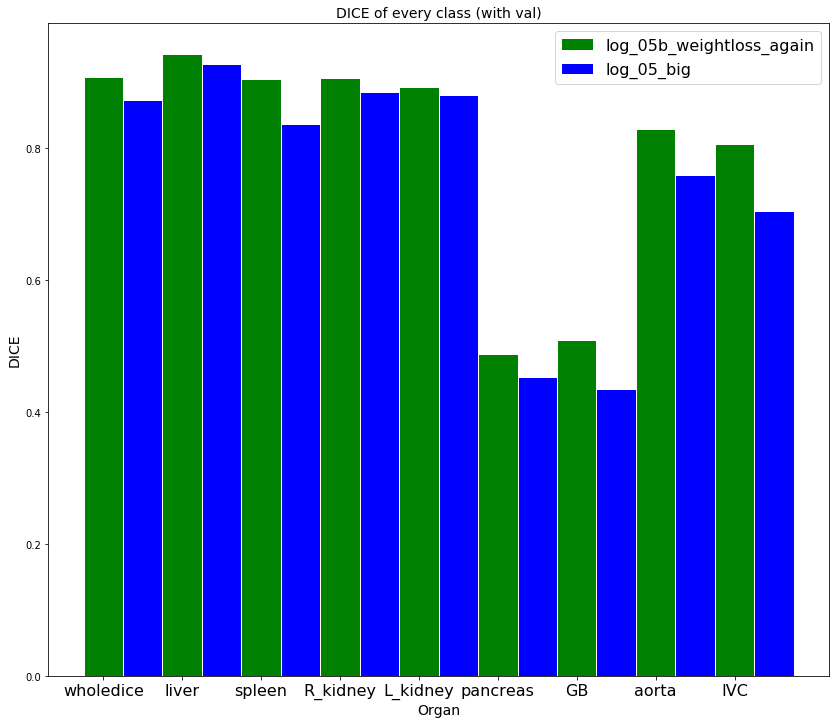

In [61]:
result_listnew.append(result_list2[4])
logdir_new.append(logdir_list2[4])
plot_everyorgan(result_listnew,logdir_new)

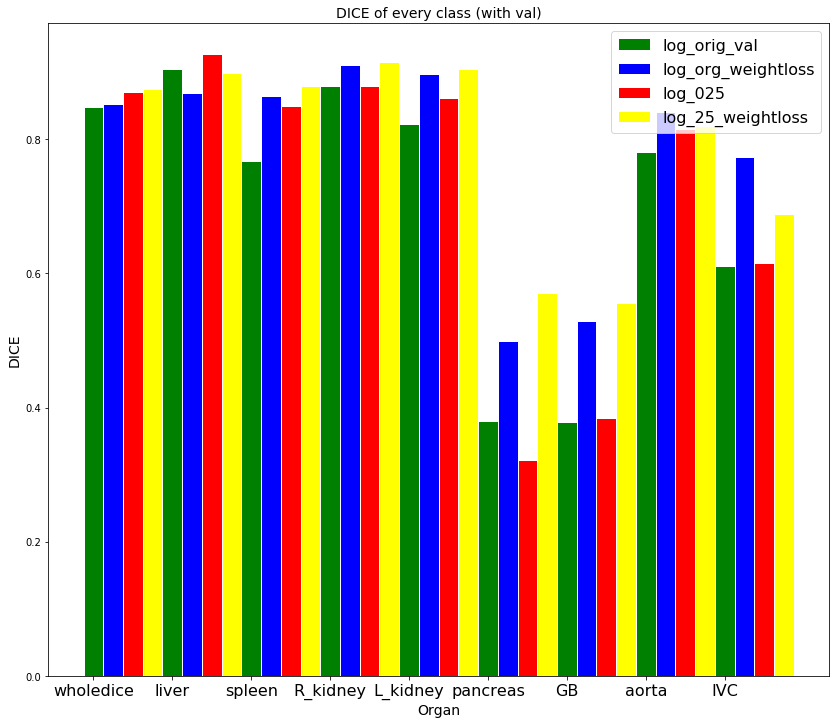

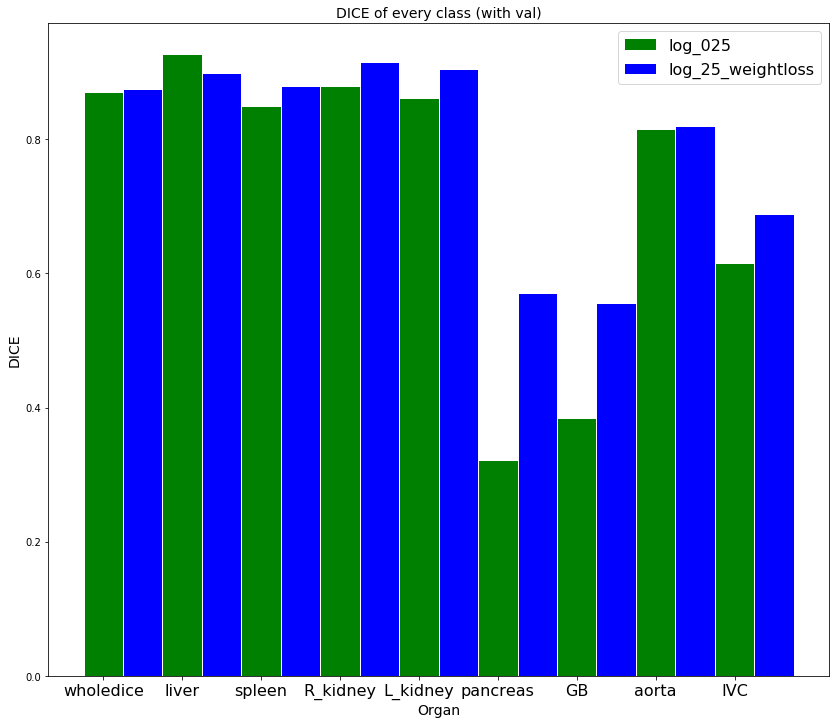

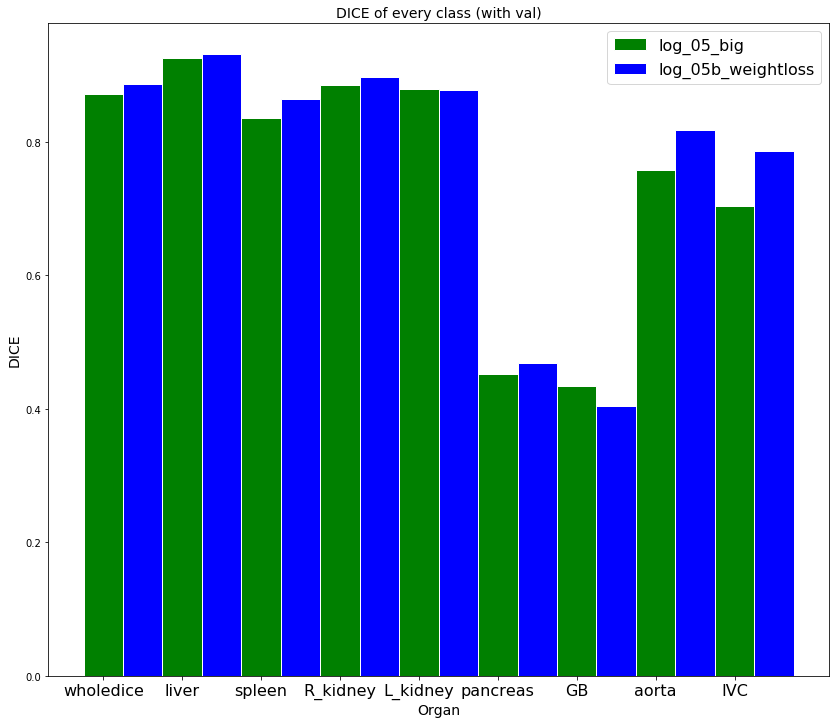

In [53]:
#plot_everyorgan(result_list1,logdir_list1)

plot_everyorgan(result_list2[0:4],logdir_list2[0:4])
plot_everyorgan(result_list2[2:4],logdir_list2[2:4])
plot_everyorgan(result_list2[4:6],logdir_list2[4:6])


In [38]:
logdir_list3 = ['log_org_val_change2','log_025_2','log_05_big_2','log_075_2','log_10_big_2']
num_arry3 = ['01','02','03','04','05','06','07','08','09','10','21','22','23','24','25']
result_list3 = []
for logdir in logdir_list3:
    result = get_dice(logdir,num_arry3)
    result_list3.append(result)

logdir_list4 = ['log_orig_val','log_025','log_05_big','log_075','log_10_big']
num_arry4 = [26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]
result_list4 = []
for logdir in logdir_list4:
    result = get_dice(logdir,num_arry4)
    result_list4.append(result)

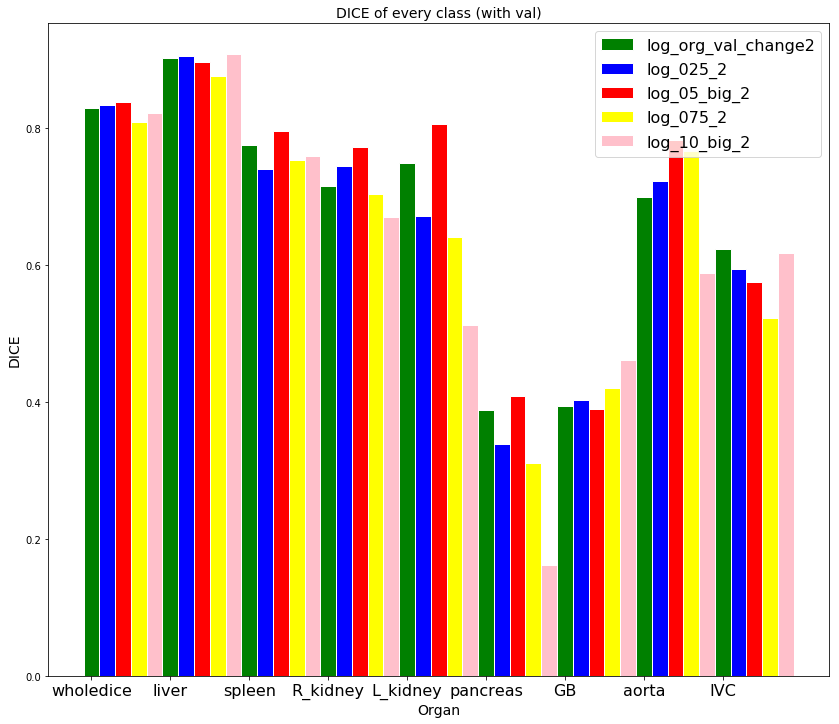

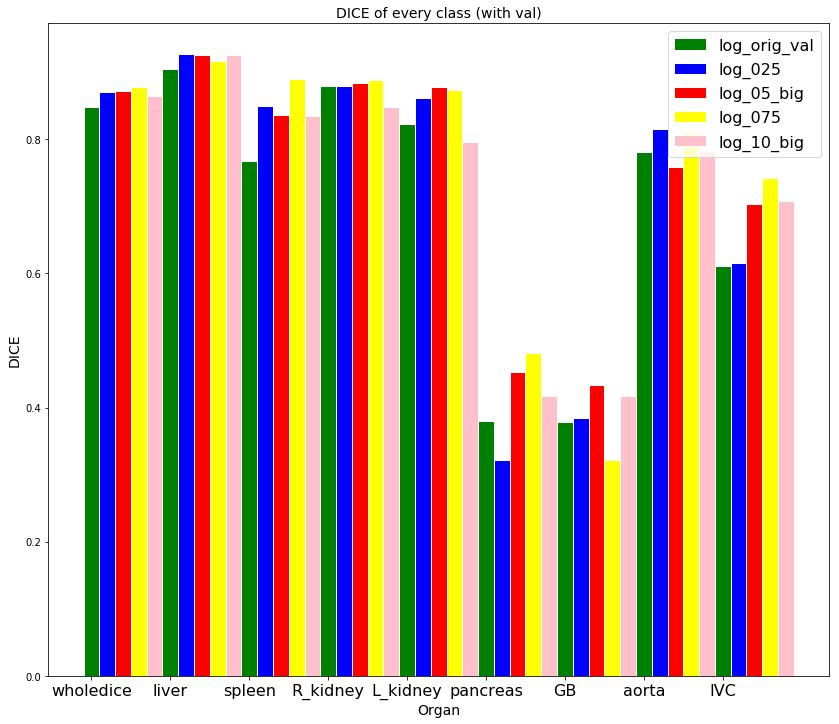

In [42]:
plot_everyorgan(result_list3,logdir_list3)

plot_everyorgan(result_list4,logdir_list4)

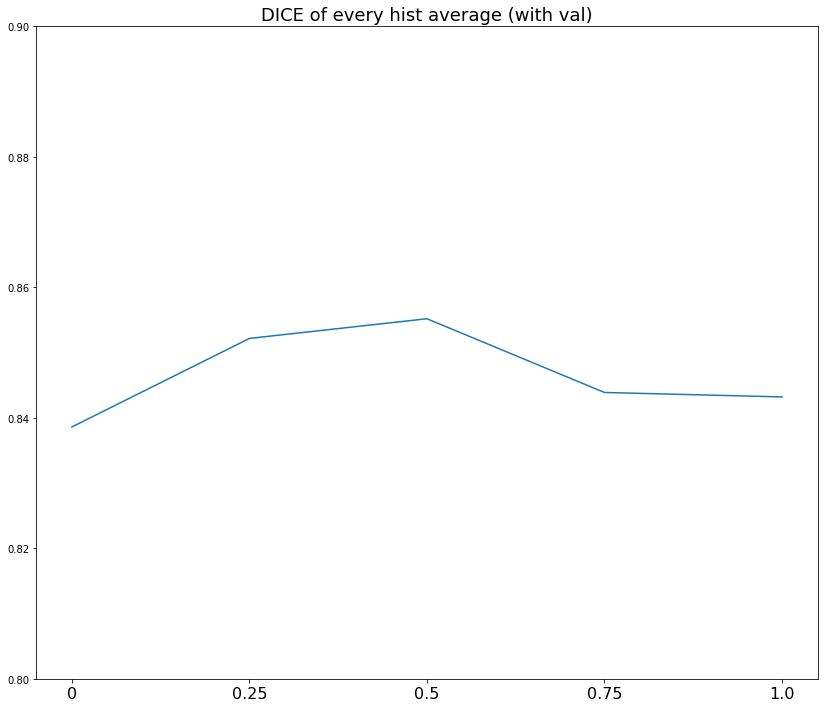

In [51]:
dice_list = []
for i in range(5):
    dice_list.append((averagenum(result_list3[i]['wholedice'])+averagenum(result_list4[i]['wholedice']))/2)

plt.figure(figsize=(14,12))
plt.plot([0,0.25,0.5,0.75,1.0],dice_list)
plt.xticks([0,0.25,0.5,0.75,1.0],[0,0.25,0.5,0.75,1.0],fontsize=16)
plt.ylim((0.8, 0.9))
plt.title(u"DICE of every hist average (with val)",fontsize=18)
plt.show()